Using model DDQN-400m-testCourse-09-12-2023_01:46


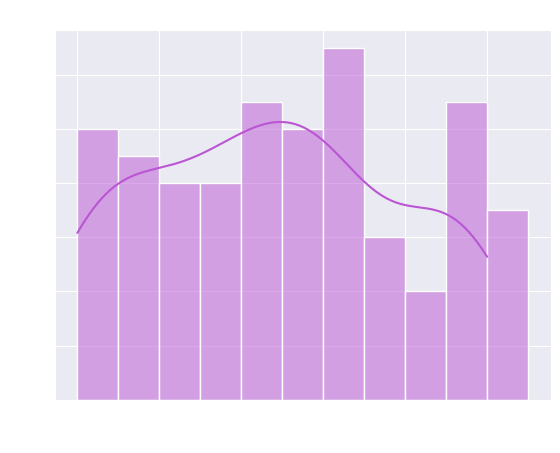

In [6]:
# - 'skyblue'
# - 'lightgreen'
# - 'salmon'
# - 'mediumorchid'
# - 'darkorange'
# - 'teal'
# - 'slategray'
# - 'cornflowerblue'
# - 'gold'
# - 'tomato'
# - 'violet'
# - 'navy'
# - 'lime'
# - 'crimson'
# - 'aqua'
# - 'darkviolet'
# - 'olive'
# - 'hotpink'
# - 'indigo'
# - 'khaki'


import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

MODEL_SLUG = sorted(os.listdir("./models/logs"))[-1]
print(f"Using model {MODEL_SLUG}")

# Load your data
actions = pd.read_csv(f"./models/logs/{MODEL_SLUG}/actions.csv")

# Set the style to 'darkgrid'
sns.set_style('darkgrid')

# Create a figure and an axes object
fig, ax = plt.subplots()

# Define the animate function that will be called for each frame of the animation
def animate(i):
    # Clear the previous plot
    ax.clear()

    # Filter the data for the current episode
    data = actions[actions['episode'] == i]

    # Create the histogram using seaborn
    sns.histplot(data=data, x='action', ax=ax, bins=range(0, 12), color='mediumorchid', kde=True)

    # Set the title of the plot
    ax.set_title(f'Episode {i}', color='white')

    # Set the color of the labels
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    # Set the color of the ticks
    ax.tick_params(colors='white')

# Create the animation object
ani = animation.FuncAnimation(fig, animate, frames=actions['episode'].nunique(), interval=75, repeat=True)

# Convert the animation to HTML and display it
HTML(ani.to_jshtml())